<a href="https://colab.research.google.com/github/schizohub/ML_projects/blob/main/price_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing necessary libraries**


In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from xgboost import XGBRegressor

  **Definition of rows:**
1.   location - address of house
2.   district - region of house
3.   rooms - number of rooms
4.   size - size of house (sqrd.m)
5.   level - stage of house
6.   max_levels - number of stages
7.   price - price of **house**









# **Working with data**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [3]:
df.isnull().sum()

location      0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [17]:
null_value = ['Договорная']
change_null = df['price'].isin(null_value)
series = df.drop(list(df[change_null].index))['price'].astype(int)
fill = np.mean(np.round(series))
df.replace({'Договорная':fill},inplace=True)
df.price = df.price.astype(int)

In [27]:
df.drop(list(df[df['price']>1_000_000].index),inplace=True)

In [28]:
df.drop(list(df[df['price']<2000].index),inplace=True)

In [33]:
nut_value = ['Площадьземли:1сот']
changed_value = df['size'].isin(nut_value)
df.drop(list(df[changed_value].index),inplace=True)

In [36]:
df['size'] = df['size'].astype(float)

In [38]:
df.drop(list(df[df['size']>500].index),inplace=True)

In [43]:
df.drop(list(df[(df['size']<20)&(df['rooms']>1)].index),inplace=True)

In [44]:
df.corrwith(df['price'])

rooms         0.547902
size          0.767627
level         0.059981
max_levels    0.219291
price         1.000000
dtype: float64

In [60]:
df.drop(list(df[(df['price']>300000)&(df['rooms']==1)].index),inplace=True)

# **Some visualizations**

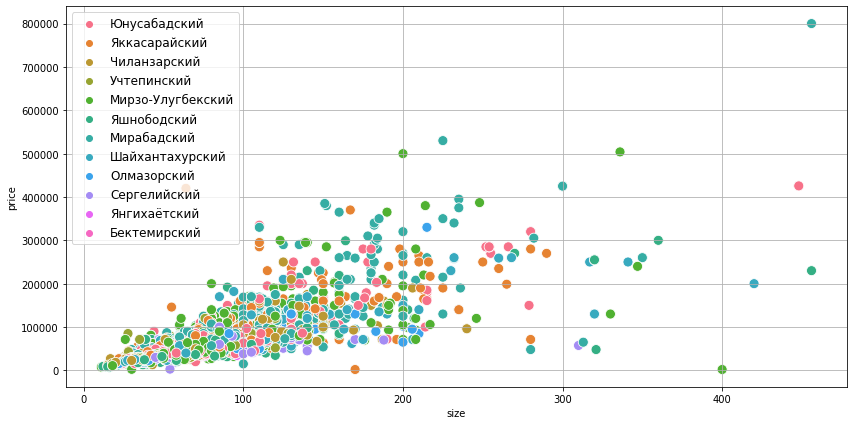

In [88]:
plt.figure(figsize=(14,7))
sns.scatterplot(data=df,x='size',y='price',hue='district',s=100)
plt.legend(loc=0,fontsize='large')
plt.grid()
plt.show()

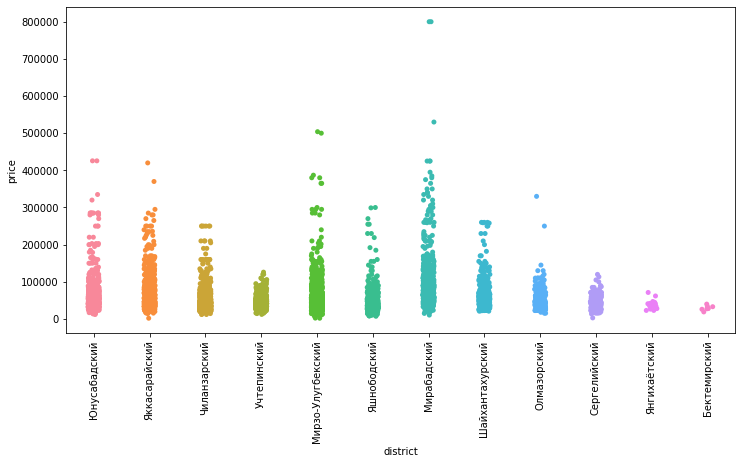

In [62]:
plt.figure(figsize=(12,6))
sns.stripplot(data=df,x='district',y='price')
plt.xticks(rotation=90)
plt.show()

In [65]:
df[df['district']=='Мирабадский']['price'].idxmax()

1695

In [67]:
df.loc[1695]

location      город Ташкент, Мирабадский район, Фидокор (Чех...
district                                            Мирабадский
rooms                                                        10
size                                                      456.0
level                                                         3
max_levels                                                    7
price                                                    800000
Name: 1695, dtype: object

In [75]:
df.drop([list(df[df['price']==800000].index)[0]],inplace=True)

In [76]:
df.corrwith(df['price'])

rooms         0.562068
size          0.785883
level         0.064187
max_levels    0.230070
price         1.000000
dtype: float64

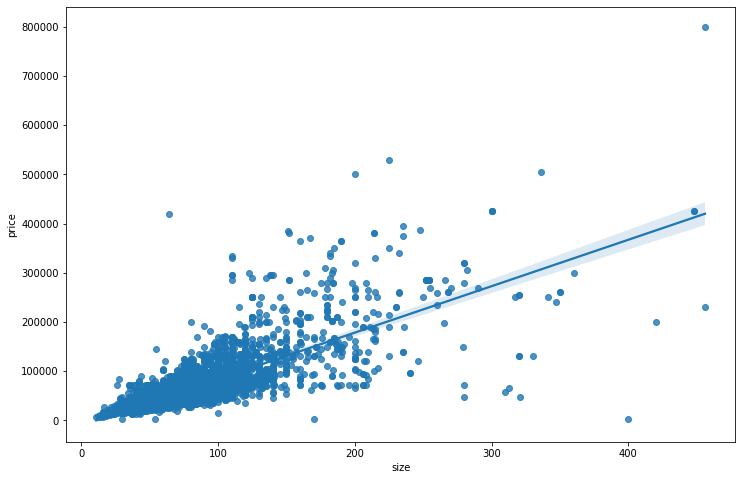

In [77]:
plt.figure(figsize=(12,8))
sns.regplot(data=df,x='size',y='price')

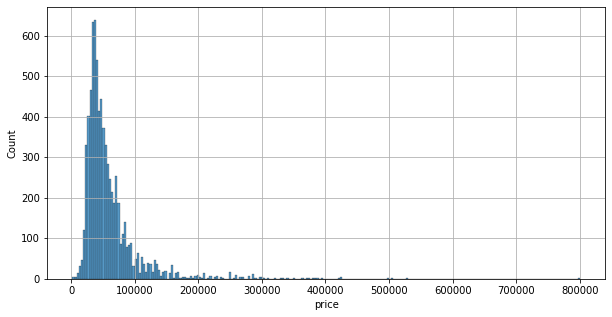

In [79]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='price')
plt.grid()
plt.show()

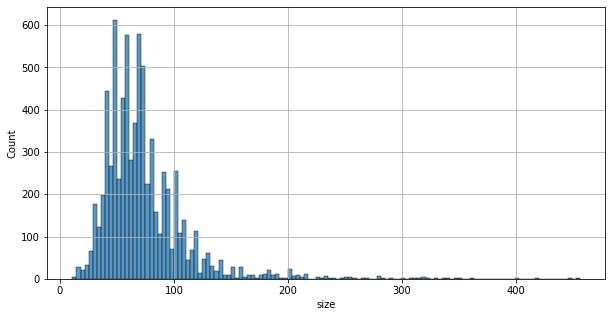

In [81]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='size')
plt.grid()
plt.show()

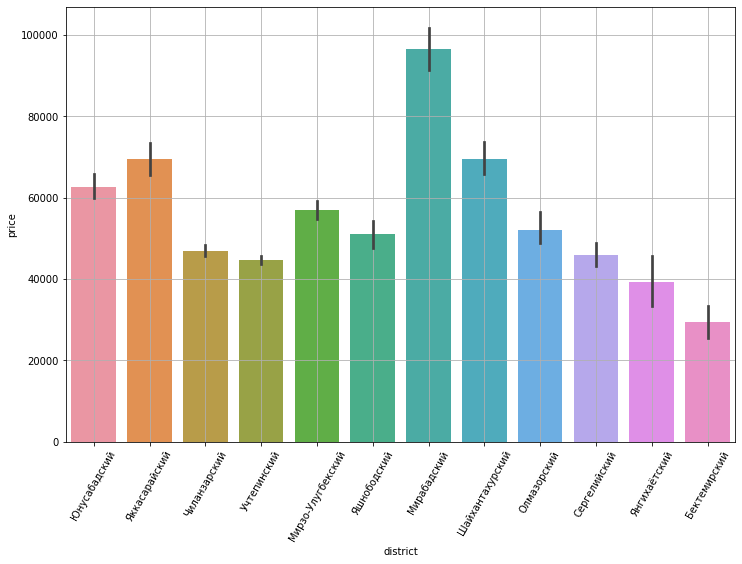

In [82]:
plt.figure(figsize=(12,8))
sns.barplot(x=df['district'],y=df['price'])
plt.xticks(rotation=60)
plt.grid()
plt.show()

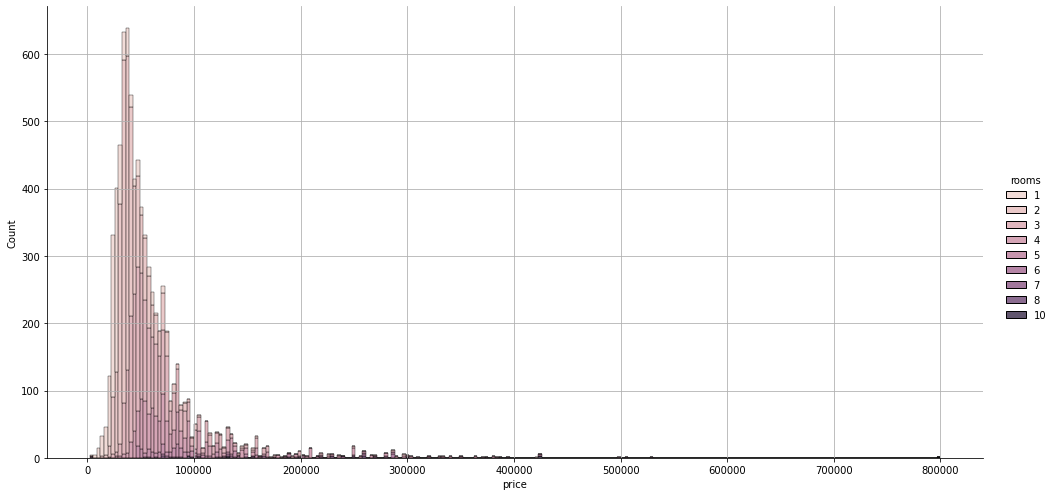

In [91]:
sns.displot(data=df,x='price',hue='rooms',multiple='stack' ,height=7,aspect=2)
plt.grid()
plt.show()

In [94]:
df_new = df[df['rooms']<4]

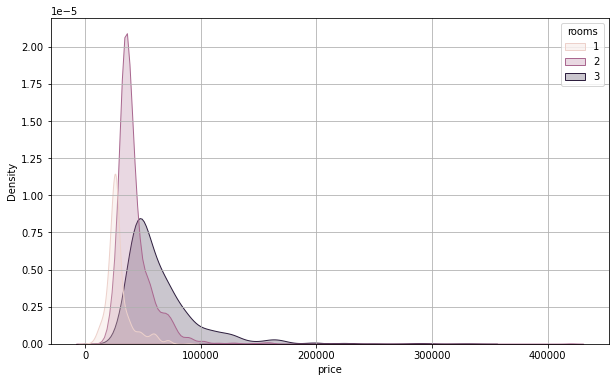

In [95]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df_new,x='price',hue='rooms',shade=True)
plt.grid(which='both')
plt.show()

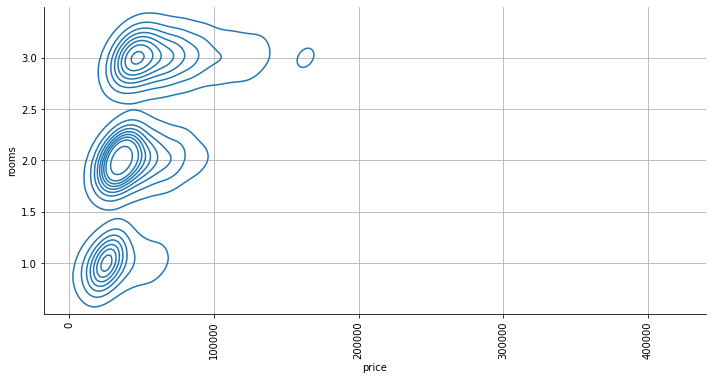

In [96]:
sns.displot(data=df_new, x="price", y="rooms", kind="kde", height=5, aspect=2)
plt.xticks(rotation=90)
plt.grid(which='major')
plt.show()

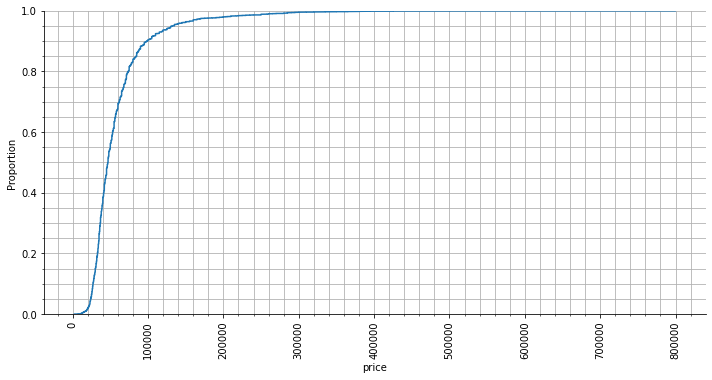

In [97]:
sns.displot(data=df, x="price", kind="ecdf", height=5, aspect=2)
plt.xticks(rotation=90)
plt.grid(which='both')
plt.minorticks_on()
plt.show()

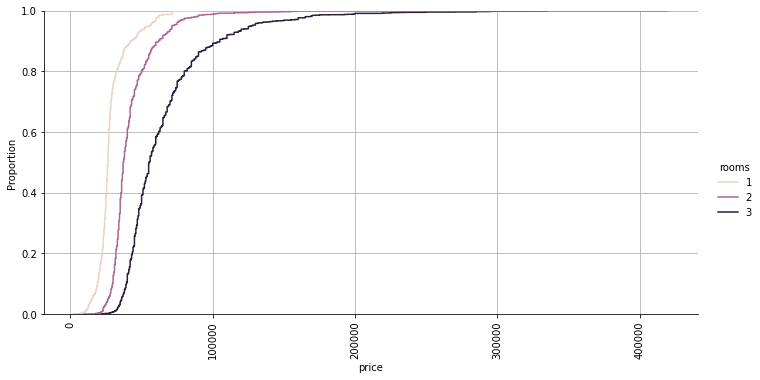

In [98]:
sns.displot(data=df_new, x="price", hue="rooms", kind="ecdf", height=5, aspect=2)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [101]:
df2 = df.corr()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning: The following kwargs were not used by contour: 'height', 'aspect'
  **contour_kws,


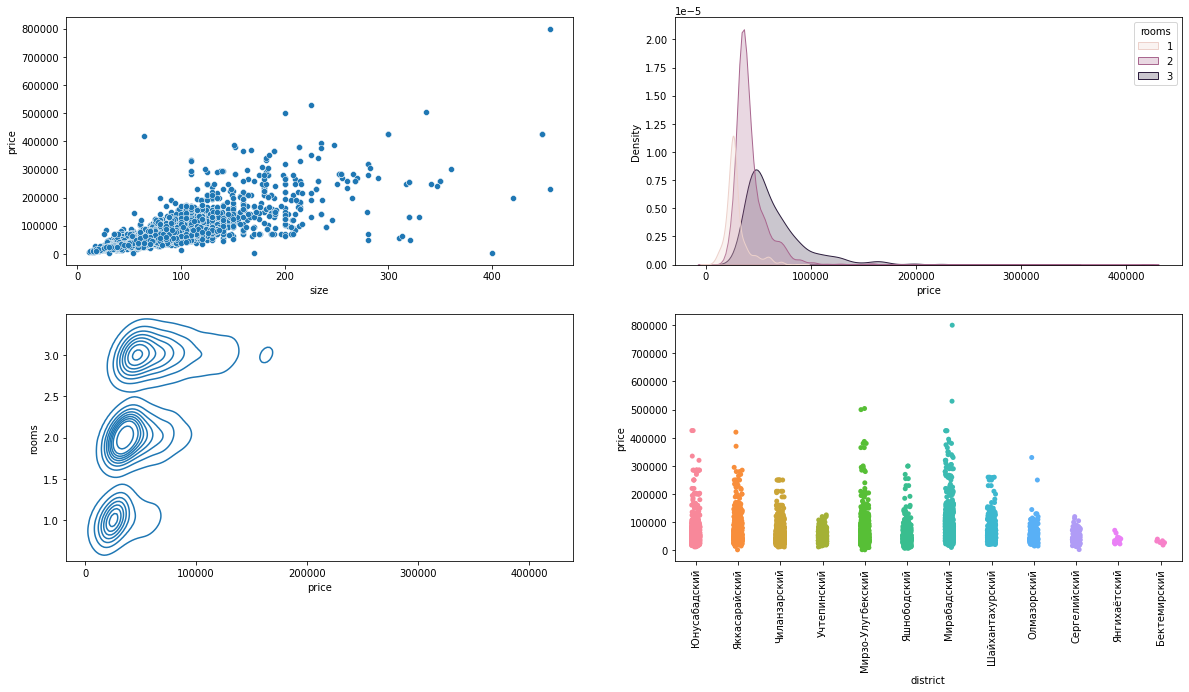

In [107]:
fig,ax = plt.subplots(2,2,figsize=(20,10))
sns.scatterplot(ax=ax[0,0],data=df,x='size',y='price')
sns.kdeplot(ax=ax[0,1],data=df_new,x='price',hue='rooms',shade=True)
sns.kdeplot(ax=ax[1,0],data=df_new, x="price", y="rooms", height=5, aspect=2)
sns.stripplot(ax=ax[1,1],data=df,x=df['district'],y=df['price'])
plt.xticks(rotation=90)
plt.show()

In [103]:
df2

,rooms,size,level,max_levels,price
rooms,1.000000,0.786551,0.137366,0.182899,0.562068
size,0.786551,1.000000,0.157717,0.272134,0.785883
level,0.137366,0.157717,1.000000,0.590861,0.064187
max_levels,0.182899,0.272134,0.590861,1.000000,0.230070
price,0.562068,0.785883,0.064187,0.230070,1.000000


# **Preparing for ML**

In [110]:
new = pd.get_dummies(df['district'])

In [163]:
new['price'] = df['price'].copy()
new['rooms'] = df['rooms'].copy()
new['size'] = df['size'].copy()
new['max_levels'] = df['max_levels'].copy()

In [170]:
main = df.drop(['district','location'],axis=1)

In [171]:
X_train,X_test = train_test_split(main,test_size=0.25, random_state=45)

In [149]:
x_train,x_test = train_test_split(new,test_size=0.25, random_state=45)

In [176]:
X_main = X_train.drop('price',axis=1)
y_main = X_train['price'].values
X_test_main = X_test.drop('price',axis=1)
y_test_main = X_test['price'].values

In [164]:
X_new = x_train.drop('price',axis=1)
y_new = x_train['price'].values
X_test_new = x_test.drop('price',axis=1)
y_test_new = x_test['price'].values

In [177]:
X_main

,rooms,size,level,max_levels
1106,1,30.0,3,5
988,5,196.0,3,6
1194,2,54.0,3,5
6967,3,65.0,4,4
4976,1,39.0,1,5
...,...,...,...,...
3629,2,45.0,3,4
6037,3,62.0,5,5
5787,5,225.0,1,5
6585,2,58.0,8,9


In [143]:
def change(x):
  std = StandardScaler()
  x = std.fit_transform(x)
  return x

In [166]:
# X_main = change(X_main)
# X_test_main = change(X_test_main)
# X_new = change(X_new)
# X_test_new = change(X_test_new)


# **Part of ML(Linear Regression)**

In [178]:
lr = LinearRegression()
lr_model = LinearRegression()
lr.fit(X_main, y_main)
lr_model.fit(X_new, y_new)

LinearRegression()

In [179]:
prediction = lr.predict(X_test_main)
r2 = r2_score(y_test_main,prediction)
mae = mean_absolute_error(y_test_main,prediction)
rmse = np.sqrt(mean_squared_error(y_test_main,prediction))
print(f"MAE is {mae},\nRMSE is {rmse},\nR2 is {r2:.2f}")

MAE is 15719.601978910412,
RMSE is 30921.93764853762,
R2 is 0.59


In [180]:
prediction = lr_model.predict(X_test_new)
r2 = r2_score(y_test_new,prediction)
mae = mean_absolute_error(y_test_new,prediction)
rmse = np.sqrt(mean_squared_error(y_test_new,prediction))
print(f"MAE is {mae},\nRMSE is {rmse},\nR2 is {r2:.2f}")

MAE is 14840.888351074982,
RMSE is 29864.776688437974,
R2 is 0.62


# **Random Forest**

In [220]:
rf = RandomForestRegressor(max_depth=20, n_estimators=100)
rf_model = RandomForestRegressor(max_depth=25, n_estimators=110)
rf.fit(X_main, y_main)
rf_model.fit(X_new, y_new)

RandomForestRegressor(max_depth=25, n_estimators=110)

In [221]:
prediction = rf.predict(X_test_main)
r2 = r2_score(y_test_main,prediction)
mae = mean_absolute_error(y_test_main,prediction)
rmse = np.sqrt(mean_squared_error(y_test_main,prediction))
print(f"MAE is {mae},\nRMSE is {rmse},\nR2 is {r2:.2f}")

MAE is 13338.959547082513,
RMSE is 27139.263817954503,
R2 is 0.69


In [222]:
prediction = rf_model.predict(X_test_new)
r2 = r2_score(y_test_new,prediction)
mae = mean_absolute_error(y_test_new,prediction)
rmse = np.sqrt(mean_squared_error(y_test_new,prediction))
print(f"MAE is {mae},\nRMSE is {rmse},\nR2 is {r2:.2f}")

MAE is 12491.36102006006,
RMSE is 27937.89410851552,
R2 is 0.67


# **Decision Tree**

In [213]:
tree = DecisionTreeRegressor(max_depth=20, min_samples_leaf=8)
tree_model = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5)
tree.fit(X_main, y_main)
tree_model.fit(X_new, y_new)

DecisionTreeRegressor(max_depth=20, min_samples_leaf=5)

In [211]:
prediction = tree.predict(X_test_main)
r2 = r2_score(y_test_main,prediction)
mae = mean_absolute_error(y_test_main,prediction)
rmse = np.sqrt(mean_squared_error(y_test_main,prediction))
print(f"MAE is {mae},\nRMSE is {rmse},\nR2 is {r2:.2f}")

MAE is 14518.745237167828,
RMSE is 29195.761938759966,
R2 is 0.64


In [214]:
prediction = tree_model.predict(X_test_new)
r2 = r2_score(y_test_new,prediction)
mae = mean_absolute_error(y_test_new,prediction)
rmse = np.sqrt(mean_squared_error(y_test_new,prediction))
print(f"MAE is {mae},\nRMSE is {rmse},\nR2 is {r2:.2f}")

MAE is 13826.713189005046,
RMSE is 27520.212751513707,
R2 is 0.68


# **SVC**

In [223]:
svc = SVC()
svc_model = SVC()
svc.fit(X_main, y_main)
svc_model.fit(X_new, y_new)

SVC()

In [224]:
prediction = svc_model.predict(X_test_new)
r2 = r2_score(y_test_new,prediction)
mae = mean_absolute_error(y_test_new,prediction)
rmse = np.sqrt(mean_squared_error(y_test_new,prediction))
print(f"MAE is {mae},\nRMSE is {rmse},\nR2 is {r2:.2f}")

MAE is 17258.737121614446,
RMSE is 36632.65657862442,
R2 is 0.43


In [225]:
prediction = svc.predict(X_test_main)
r2 = r2_score(y_test_main,prediction)
mae = mean_absolute_error(y_test_main,prediction)
rmse = np.sqrt(mean_squared_error(y_test_main,prediction))
print(f"MAE is {mae},\nRMSE is {rmse},\nR2 is {r2:.2f}")

MAE is 17273.695167286245,
RMSE is 37357.856492827785,
R2 is 0.41


# **XGBOOST**

In [226]:
xgb = XGBRegressor()
xgb_model = XGBRegressor()
xgb.fit(X_main, y_main)
xgb_model.fit(X_new, y_new)

[15:37:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:37:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [227]:
prediction = xgb.predict(X_test_main)
r2 = r2_score(y_test_main,prediction)
mae = mean_absolute_error(y_test_main,prediction)
rmse = np.sqrt(mean_squared_error(y_test_main,prediction))
print(f"MAE is {mae},\nRMSE is {rmse},\nR2 is {r2:.2f}")

MAE is 14149.659766765964,
RMSE is 27252.860016120532,
R2 is 0.68


In [229]:
prediction = xgb_model.predict(X_test_new)
r2 = r2_score(y_test_new,prediction)
mae = mean_absolute_error(y_test_new,prediction)
rmse = np.sqrt(mean_squared_error(y_test_new,prediction))
print(f"MAE is {mae},\nRMSE is {rmse},\nR2 is {r2:.2f}")

MAE is 13710.541159801514,
RMSE is 28653.747966937164,
R2 is 0.65


# **Bayesian Ridge**

In [230]:
bayesian = BayesianRidge()
bayesian_model = BayesianRidge()
bayesian.fit(X_main, y_main)
bayesian_model.fit(X_new, y_new)

BayesianRidge()

In [231]:
prediction = bayesian.predict(X_test_main)
r2 = r2_score(y_test_main,prediction)
mae = mean_absolute_error(y_test_main,prediction)
rmse = np.sqrt(mean_squared_error(y_test_main,prediction))
print(f"MAE is {mae},\nRMSE is {rmse},\nR2 is {r2:.2f}")

MAE is 15716.35657988214,
RMSE is 30917.24049197594,
R2 is 0.59


In [232]:
prediction = bayesian_model.predict(X_test_new)
r2 = r2_score(y_test_new,prediction)
mae = mean_absolute_error(y_test_new,prediction)
rmse = np.sqrt(mean_squared_error(y_test_new,prediction))
print(f"MAE is {mae},\nRMSE is {rmse},\nR2 is {r2:.2f}")

MAE is 14804.38750209459,
RMSE is 29866.653489413653,
R2 is 0.62
